In [138]:
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [139]:
import numpy as np
import pandas as pd
from glob import glob
import os
import json


import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings(action='ignore')

In [140]:
data_path = 'E:/dataset/korean/korean/text_print'

In [141]:
# 1. 데이터 불러오기
file_list = [glob(os.path.join(data_path, 'sentence/*png')), glob(os.path.join(data_path, 'syllable/*png')),
             glob(os.path.join(data_path, 'word/*png'))]
file_list[0][0:10]

['E:/dataset/korean/korean/text_print\\sentence\\03343000.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343001.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343002.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343003.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343004.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343005.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343006.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343007.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343008.png',
 'E:/dataset/korean/korean/text_print\\sentence\\03343009.png']

In [142]:
with open(os.path.join(data_path,'printed_data_info.json'), 'r', encoding='utf-8') as f:
    json_data = json.load(f)

#print(json.dumps(json_data, indent="\t"))

In [143]:
json_data['annotations'][0]

{'attributes': {'font': '만화진흥원', 'type': '글자(음절)', 'is_aug': False},
 'id': '00000000',
 'image_id': '00000000',
 'text': '궶'}

In [144]:
before = ''
type_list = []
for i in range(len(json_data['annotations'])):
    if before != json_data['annotations'][i]['attributes']['type']:
        type_list.append(json_data['annotations'][i]['attributes']['type'])
    before = json_data['annotations'][i]['attributes']['type']

type_list

['글자(음절)', '단어(어절)', '문장']

In [145]:
#2. 데이터 시각화
#type별 데이터 개수 
type_count = []
for i in range(len(type_list)):
    type_count.append(0)
    for j in range(len(json_data['annotations'])):
        if type_list[i] == json_data['annotations'][j]['attributes']['type']:
            type_count[i] += 1
type_count


[532659, 262753, 40304]

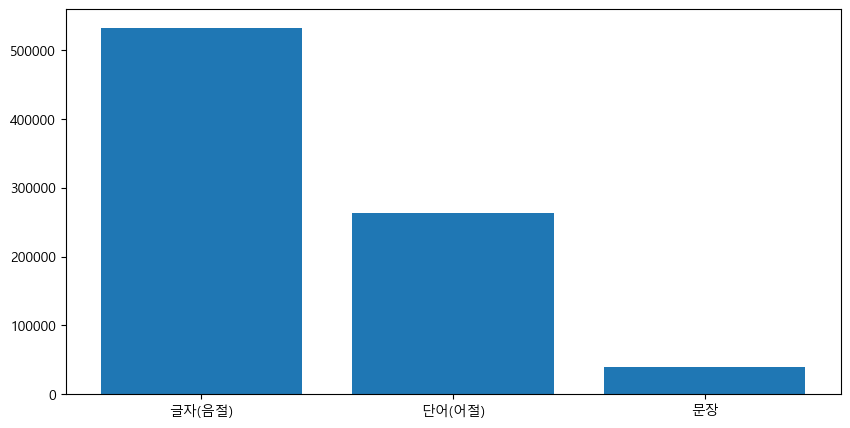

In [146]:
plt.figure(figsize=(10,5))
plt.bar(type_list, type_count)
plt.show()

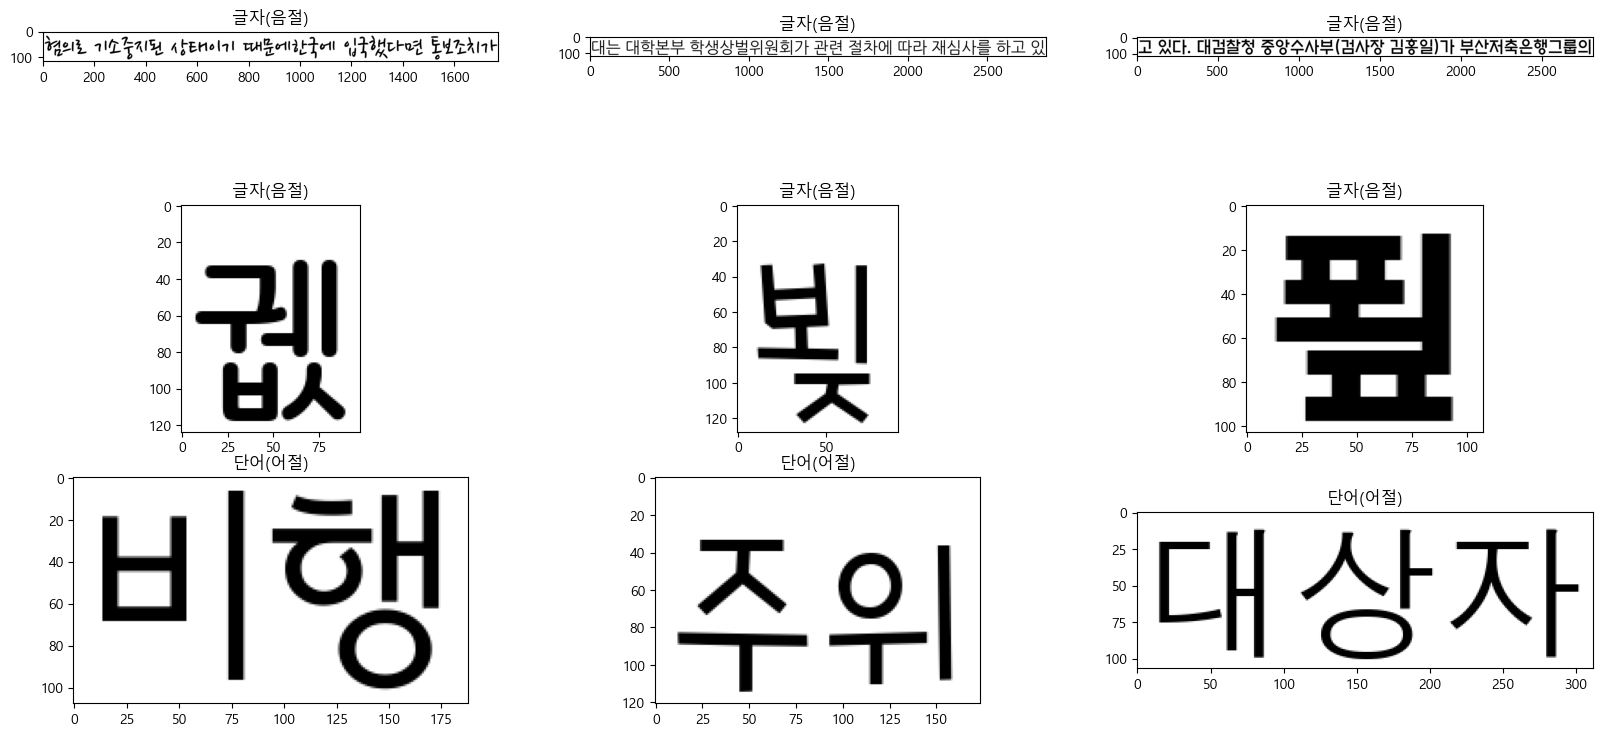

In [147]:
#type별 데이터 시각화
plt.figure(figsize=(20,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(file_list[i//3][i%3]))
    plt.title(type_list[(i//3+1)//3])

In [148]:
#위 데이터를 test 폴더에 복사
import shutil

for i in range(0,9):
   if os.path.exists(os.path.join(os.getcwd(),'test')): #test 폴더가 존재하면
       #print( file_list[i//3][i%3],'의 파일을 ', os.path.join(os.getcwd(),'test'),'에 복사합니다.')
       shutil.copy(file_list[i//3][i%3], os.path.join(os.getcwd(),'test'))
       
   else:
       os.mkdir(os.path.join(os.getcwd(),'test')) #test 폴더가 존재하지 않으면 만들고
       shutil.copy(file_list[i//3][i%3], os.path.join(os.getcwd(),'test'))
      
       

In [149]:
#text detection with Naver corp. CRAFT
#%pip install -r ./CRAFT-pytorch/requirements.txt #요구 모듈의 버전을 제거 후 설치 


# Error#1. 
model_URL 오류 발생시 <a href =https://github.com/clovaai/CRAFT-pytorch/issues/191>여기<a>을 참고하여 model/vgg의 코드를 추가 한뒤 실행하시오.
# Error#2. 
model.VGG16_BN(pretrained=False, **kwargs)의 pretrained는 torchvision 0.13.0 이후 지원하지 않기에 <a href = https://github.com/JaidedAI/EasyOCR/issues/766>여기<a>를 참고하여 다음과 같이 수정하시오. 
CRAFT-pytorch/basenet/vgg16_bn.py와 CRAFT-pytorch/craft.py에 pretrained를 지우고 weights='VGG16_BN_Weights.DEFAULT'를 추가하면 높은 torchvision 버전에서도 실행이 가능하다.



```!python ./CRAFT-pytorch/test.py --trained_model=./CRAFT-pytorch/model/craft_mlt_25k.pth --test_folder='E:/dataset/korean/korean/text_print/word' --cuda=True```

위 코드를 실행하면 detection 결과가 ./result/에 저장된다. 


In [150]:
#detected text 시각화
#test 폴더의 파일을 CRAFT-pytorch 를 이용해서 detection
!python ./CRAFT-pytorch/test.py --trained_model=./CRAFT-pytorch/model/craft_mlt_25k.pth --test_folder=./test/ --cuda=True`
   

Loading weights from checkpoint (./CRAFT-pytorch/model/craft_mlt_25k.pth)
cpu
Test image 1/9: ./test/00000000.png
Test image 2/9: ./test/00000001.png
Test image 3/9: ./test/00000002.png
Test image 4/9: ./test/02234400.png
Test image 5/9: ./test/02234401.png
Test image 6/9: ./test/02234402.png
Test image 7/9: ./test/03343000.png
Test image 8/9: ./test/03343001.png
Test image 9/9: ./test/03343002.png
elapsed time : 1.3892834186553955s


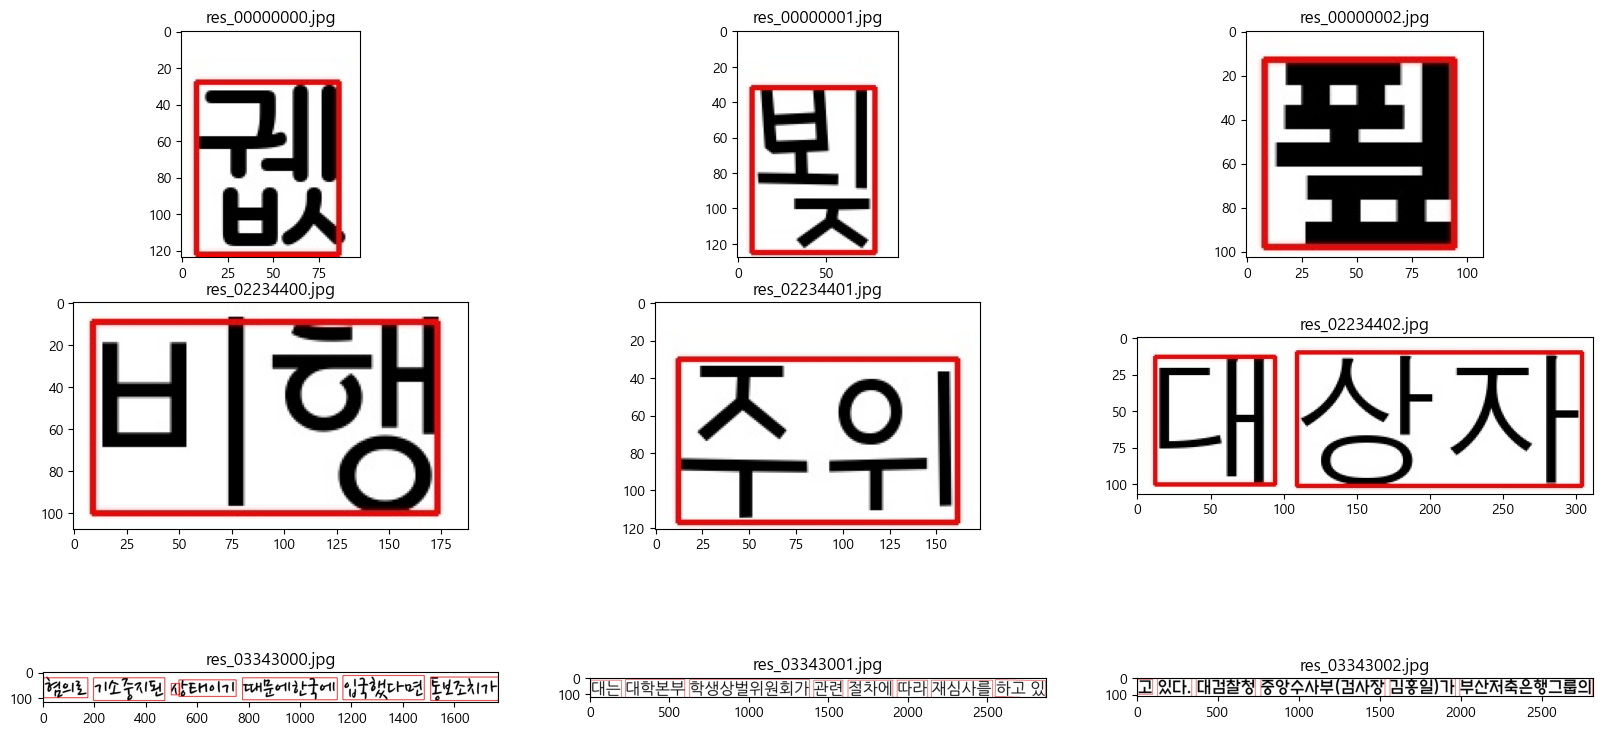

In [151]:
#detected text 시각화 결과 확인
plt.figure(figsize=(20,10))
detected_list = glob('./result/*jpg')[0::2] #홀수번째 파일만 가져오기 짝수번째에는 detection mask가 있음

for i in detected_list:
    plt.subplot(3,3,detected_list.index(i)+1)
    plt.imshow(plt.imread(i))
    plt.title(i.split('\\')[-1])
